# Gender Classification from names

## Edit dataset

In [139]:
import pandas as pd

GenderData = pd.read_csv('KGGenderDataset.csv', usecols=[0,1])
GenderData.head()

,CustomerName,Gender
0,GERALL OWEN,M
1,Mardatomi Maselta,M
2,Stefanus Suyono,M
3,Mohamad Iwan Cahyadi,M
4,HKF Official,F


In [140]:
GenderData.dtypes

CustomerName    object
Gender          object
dtype: object

In [141]:
GenderData.isna().sum() #lihat jika ada null value

CustomerName    364
Gender          375
dtype: int64

In [142]:
GenderData = GenderData.dropna() #drop null value

In [143]:
GenderData.isna().sum() #check lagi ada null value

CustomerName    0
Gender          0
dtype: int64

In [144]:
# Function to split names
def split_name(name):

    name = name.lower()
    parts = name.split()
    
    # Initialize the result as empty strings for all parts
    first_name = second_name = third_name = fourth_name = last_name = ' '
    
    if len(parts) >= 1:
        first_name = parts[0]  # First name
    if len(parts) >= 2:
        second_name = parts[1]  # Second name
    if len(parts) >= 3:
        third_name = parts[2]  # Third name
    if len(parts) >= 4:
        fourth_name = parts[3]  # Fourth name
    if len(parts) >= 5:
        # If more than 4 parts, concatenate all additional names to LastName
        last_name = ' '.join(parts[4:])
    
    return pd.Series([first_name, second_name, third_name, fourth_name, last_name])
        
# Apply function to the DataFrame
GenderData[['FirstName', 'SecondName', 'ThirdName', 'FourthName', 'LastName']] = GenderData['CustomerName'].apply(split_name)

In [145]:
GenderData.head(20)

,CustomerName,Gender,FirstName,SecondName,ThirdName,FourthName,LastName
0,GERALL OWEN,M,gerall,owen,,,
1,Mardatomi Maselta,M,mardatomi,maselta,,,
2,Stefanus Suyono,M,stefanus,suyono,,,
3,Mohamad Iwan Cahyadi,M,mohamad,iwan,cahyadi,,
4,HKF Official,F,hkf,official,,,
5,Rizky Bramantyo,M,rizky,bramantyo,,,
6,Enya grace,F,enya,grace,,,
7,nhia pram,F,nhia,pram,,,
8,Sintya Handayani,F,sintya,handayani,,,
9,Aril Al Kautsar,M,aril,al,kautsar,,


In [146]:
GenderData.isna().sum() #check null value

CustomerName    0
Gender          0
FirstName       0
SecondName      0
ThirdName       0
FourthName      0
LastName        0
dtype: int64

In [147]:
GenderData = GenderData.drop('CustomerName', axis=1) #drop column CustomerName

In [148]:
GenderData.head(40)

,Gender,FirstName,SecondName,ThirdName,FourthName,LastName
0,M,gerall,owen,,,
1,M,mardatomi,maselta,,,
2,M,stefanus,suyono,,,
3,M,mohamad,iwan,cahyadi,,
4,F,hkf,official,,,
5,M,rizky,bramantyo,,,
6,F,enya,grace,,,
7,F,nhia,pram,,,
8,F,sintya,handayani,,,
9,M,aril,al,kautsar,,


In [149]:
GenderData['Gender'] = GenderData['Gender'].str.upper()

In [150]:
print(GenderData['Gender'].value_counts())

Gender
M    51505
F    48460
Name: count, dtype: int64


In [151]:
import re

# Regular expression to find special characters, excluding periods (.), apostrophes ('), hyphens (-), and double quotation marks (")
special_char_pattern = re.compile(r'[^a-zA-Z0-9\s."\'-]')

# Get the rows with special characters in any of the name columns
rows_with_special_chars = GenderData[
    GenderData['FirstName'].str.contains(special_char_pattern, na=False) |
    GenderData['SecondName'].str.contains(special_char_pattern, na=False) |
    GenderData['ThirdName'].str.contains(special_char_pattern, na=False) |
    GenderData['FourthName'].str.contains(special_char_pattern, na=False) |
    GenderData['LastName'].str.contains(special_char_pattern, na=False)
]

# Get the index of the rows with special characters
rows_with_special_chars_index = rows_with_special_chars.index

# Drop the rows with special characters from the original DataFrame
GenderData_cleaned = GenderData.drop(rows_with_special_chars_index)

# Get the count and a preview of the remaining names
count_cleaned = GenderData_cleaned.shape[0]
sample_names_cleaned = GenderData_cleaned[['FirstName', 'SecondName', 'ThirdName', 'FourthName', 'LastName']].head(20)

print(f"Total names after removing rows with special characters: {count_cleaned}")
print("Sample remaining names:")
print(sample_names_cleaned)


Total names after removing rows with special characters: 99516
Sample remaining names:
    FirstName SecondName ThirdName FourthName LastName
0      gerall       owen                              
1   mardatomi    maselta                              
2    stefanus     suyono                              
3     mohamad       iwan   cahyadi                    
4         hkf   official                              
5       rizky  bramantyo                              
6        enya      grace                              
7        nhia       pram                              
8      sintya  handayani                              
9        aril         al   kautsar                    
10      ragel    pranata                              
11      rando      lubis                              
12        dwi     kurnia      asih                    
13   meisyani     fadila                              
14      omega    purnomo                              
15      wirya     kusuma         

In [152]:
print(GenderData['Gender'].value_counts())

Gender
M    51505
F    48460
Name: count, dtype: int64


In [135]:
GenderData.to_csv("KGGenderDatasetClean.csv", index=False) #save clean dataset

## Random Forest

In [153]:
import pandas as pd

GenderData = pd.read_csv('KGGenderDatasetClean.csv')
GenderData.head()

,Gender,FirstName,SecondName,ThirdName,FourthName,LastName
0,M,gerall,owen,,,
1,M,mardatomi,maselta,,,
2,M,stefanus,suyono,,,
3,M,mohamad,iwan,cahyadi,,
4,F,hkf,official,,,


### preprocess data

In [154]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from collections import Counter
from random import sample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_extraction.text import HashingVectorizer

# Preprocess data (apply transformations as per your previous steps)
X = GenderData[['FirstName', 'SecondName', 'ThirdName', 'FourthName', 'LastName']].astype(str)

# Extract bigrams
def get_bigrams(name):
    return ' '.join(name[i:i+2] for i in range(len(name)-1)) if isinstance(name, str) else ""

X = X.map(get_bigrams)
X["FullName"] = X.apply(lambda row: ' '.join(row), axis=1)

# Encode target variable
y = GenderData['Gender'].map({'M': 0, 'F': 1})

# Apply HashingVectorizer
vectorizer = HashingVectorizer(analyzer='char', ngram_range=(2, 2), n_features=1000)
X_hashed = vectorizer.fit_transform(X["FullName"])

# Convert sparse matrix to DataFrame
X_df = pd.DataFrame(X_hashed.toarray())

# Remove low-variance features
selector = VarianceThreshold(threshold=1e-4)
X_df = pd.DataFrame(selector.fit_transform(X_df))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


### Algorithm

Random Forest CART Training Metrics:
Training Time: 1574.0105 seconds
Accuracy: 0.7436
Precision: 0.7744
Recall: 0.6718
F1 Score: 0.7195


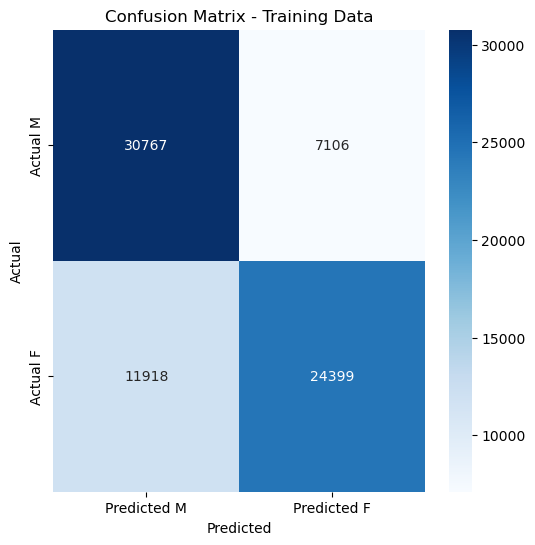

Random Forest CART Metrics:
Testing Time: 4.1149 seconds
Accuracy: 0.7402
Precision: 0.7745
Recall: 0.6644
F1 Score: 0.7152


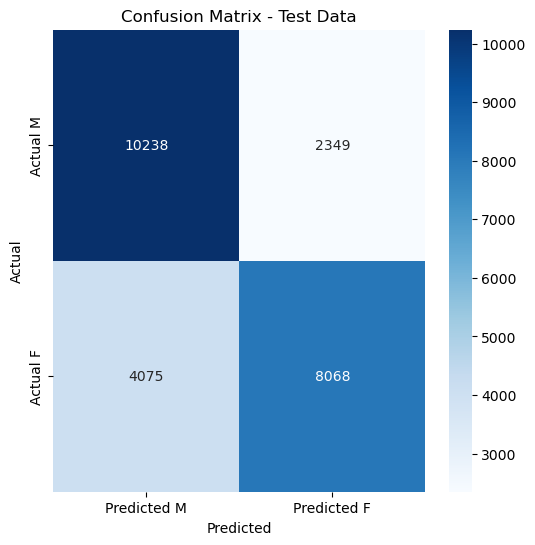

In [156]:
# Your RandomForestCART class definition (no change here)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import time


class CARTTree:
    def __init__(self, min_samples_split=10, max_depth=5):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        # Check for stopping condition: max depth, min samples split, or pure node
        if depth >= self.max_depth or len(y) < self.min_samples_split or len(set(y)) == 1:
            return Counter(y).most_common(1)[0][0]
    
        best_split = self._find_best_split(X, y)
        if best_split is None:
            return Counter(y).most_common(1)[0][0]
    
        feature, threshold, left_idx, right_idx = best_split
    
        # Safeguard: Ensure that both left_idx and right_idx are not empty
        if len(left_idx) == 0 or len(right_idx) == 0:
            return Counter(y).most_common(1)[0][0]
    
        # Safeguard: Ensure the subsets have sufficient data for further splitting
        if len(left_idx) < self.min_samples_split or len(right_idx) < self.min_samples_split:
            return Counter(y).most_common(1)[0][0]
    
        node = {"feature": feature, "threshold": threshold, "left": None, "right": None}
    
        node["left"] = self._build_tree(X[left_idx], y[left_idx], depth + 1)
        node["right"] = self._build_tree(X[right_idx], y[right_idx], depth + 1)
    
        return node


    def _find_best_split(self, X, y):
        best_feature, best_threshold, best_gini = None, None, float("inf")
        best_left_idx, best_right_idx = None, None
    
        for feature in range(X.shape[1]):  # Index-based iteration for columns
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_idx = X[:, feature] <= threshold
                right_idx = X[:, feature] > threshold
    
                left_y = y[left_idx]
                right_y = y[right_idx]

                gini = self._gini_impurity(left_y, right_y)
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold
                    best_left_idx, best_right_idx = left_idx, right_idx
    
        return (best_feature, best_threshold, best_left_idx, best_right_idx) if best_feature is not None else None

    def _gini_impurity(self, left_y, right_y):
        def gini(y):
            counts = np.bincount(y)
            probs = counts / len(y)
            return 1 - np.sum(probs ** 2)
        
        n_left, n_right = len(left_y), len(right_y)
        n_total = n_left + n_right
        return (n_left / n_total) * gini(left_y) + (n_right / n_total) * gini(right_y)

    def predict_sample(self, sample, node):
        while isinstance(node, dict):
            if sample[node["feature"]] <= node["threshold"]:
                node = node["left"]
            else:
                node = node["right"]
        return node

    def predict(self, X):
        return np.array([self.predict_sample(sample, self.tree) for sample in X])

class RandomForestCART:
    def __init__(self, n_trees=10, sample_size=0.8, min_samples_split=10, max_depth=5, max_features="sqrt"):
        self.n_trees = n_trees
        self.sample_size = sample_size
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []
        self.selected_features = []
    
    def fit(self, X, y):
        n_samples = int(self.sample_size * len(X))
        n_features = self._calculate_n_features(X)
        
        for _ in range(self.n_trees):
            X_sample, y_sample = resample(X, y, n_samples=n_samples, random_state=None)
            selected_features = tuple(sample(range(X.shape[1]), n_features))
            self.selected_features.append(selected_features)
            
            tree = CARTTree(min_samples_split=self.min_samples_split, max_depth=self.max_depth)
            tree.fit(X_sample[:, selected_features], y_sample)
            self.trees.append(tree)
    
    def predict(self, X):
        tree_preds = np.zeros((self.n_trees, X.shape[0]), dtype=np.int32)
        for i, features in enumerate(self.selected_features):
            tree_preds[i] = self.trees[i].predict(X[:, features])
        return np.apply_along_axis(lambda x: Counter(x).most_common(1)[0][0], axis=0, arr=tree_preds)
    
    def _calculate_n_features(self, X):
        if self.max_features == "sqrt":
            return max(1, int(np.sqrt(X.shape[1])))
        elif self.max_features == "log2":
            return max(1, int(np.log2(X.shape[1])))
        elif isinstance(self.max_features, int):
            return min(X.shape[1], self.max_features)
        else:
            return X.shape[1]

# Train Random Forest CART
start_time_train = time.time()
rf = rf = RandomForestCART(n_trees=50, sample_size=0.8, max_features="sqrt", max_depth=5, min_samples_split=10)
rf.fit(X_train, y_train)
end_time_train = time.time()

y_train_pred = rf.predict(X_train)

# Evaluate on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='binary')
train_recall = recall_score(y_train, y_train_pred, average='binary')
train_f1 = f1_score(y_train, y_train_pred, average='binary')

# Print training metrics
print("Random Forest CART Training Metrics:")
print(f"Training Time: {end_time_train - start_time_train:.4f} seconds")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

# Confusion Matrix for Training Data
train_cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted M', 'Predicted F'], yticklabels=['Actual M', 'Actual F'])
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Predict on Test Data
start_time_test = time.time()
y_pred = rf.predict(X_test)
end_time_test = time.time()

# Evaluate on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print test metrics
print("Random Forest CART Metrics:")
print(f"Testing Time: {end_time_test - start_time_test:.4f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix for Test Data
test_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted M', 'Predicted F'], yticklabels=['Actual M', 'Actual F'])
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [161]:
import joblib

# Save the trained model
joblib.dump(rf, "random_forest_cart.pkl")


['random_forest_cart.pkl']

## Using the model

In [157]:
import pandas as pd

GenderData = pd.read_csv('DatasetGenderNeededClarify.csv', usecols=[1,2])
GenderData.head()

,CustomerName,Gender
0,lisa noviani,NaN
1,Ulfi Naziatin Ayuningtyas,NaN
2,Citra Ayu,NaN
3,Ragil Janedi,NaN
4,Muhammad Ridho Nurul Ihsan,NaN


In [158]:
GenderData.isna().sum() #lihat jika ada null value

CustomerName        186
Gender          2731127
dtype: int64

In [159]:
GenderData = GenderData.dropna(subset=['CustomerName'], how='all')
GenderData.isna().sum() #lihat jika ada null value


CustomerName          0
Gender          2730941
dtype: int64

In [162]:
# Function to split names
def split_name(name):

    name = name.lower()
    parts = name.split()
    
    # Initialize the result as empty strings for all parts
    first_name = second_name = third_name = fourth_name = last_name = ' '
    
    if len(parts) >= 1:
        first_name = parts[0]  # First name
    if len(parts) >= 2:
        second_name = parts[1]  # Second name
    if len(parts) >= 3:
        third_name = parts[2]  # Third name
    if len(parts) >= 4:
        fourth_name = parts[3]  # Fourth name
    if len(parts) >= 5:
        # If more than 4 parts, concatenate all additional names to LastName
        last_name = ' '.join(parts[4:])
    
    return pd.Series([first_name, second_name, third_name, fourth_name, last_name])
        
# Apply function to the DataFrame
GenderData[['FirstName', 'SecondName', 'ThirdName', 'FourthName', 'LastName']] = GenderData['CustomerName'].apply(split_name)
GenderData.head(5)

,CustomerName,Gender,FirstName,SecondName,ThirdName,FourthName,LastName
0,lisa noviani,NaN,lisa,noviani,,,
1,Ulfi Naziatin Ayuningtyas,NaN,ulfi,naziatin,ayuningtyas,,
2,Citra Ayu,NaN,citra,ayu,,,
3,Ragil Janedi,NaN,ragil,janedi,,,
4,Muhammad Ridho Nurul Ihsan,NaN,muhammad,ridho,nurul,ihsan,


In [163]:
GenderData = GenderData.drop('CustomerName', axis=1) #drop column CustomerName

In [164]:
import time
import pandas as pd
import numpy as np

# Start the timer
start_time = time.time()

# Load the new dataset (assuming it's in a DataFrame called GenderData)
X_new = GenderData[['FirstName', 'SecondName', 'ThirdName', 'FourthName', 'LastName']].astype(str)

# Extract bigrams
X_new = X_new.map(get_bigrams)
X_new["FullName"] = X_new.apply(lambda row: ' '.join(row), axis=1)

# Apply HashingVectorizer (same settings as before)
X_new_hashed = vectorizer.transform(X_new["FullName"])  # Use transform(), not fit_transform()

# Convert sparse matrix to DataFrame
X_new_df = pd.DataFrame(X_new_hashed.toarray())

# Remove low-variance features (apply the same selector)
X_new_df = pd.DataFrame(selector.transform(X_new_df))

# Scale features (apply the same scaler)
X_new_scaled = scaler.transform(X_new_df)

# Predict using the trained model
y_pred_new = rf.predict(X_new_scaled)

# Map predictions back to 'M' and 'F'
GenderData["Predicted_Gender"] = np.where(y_pred_new == 0, 'M', 'F')

# Stop the timer
end_time = time.time()
execution_time = end_time - start_time

# Display the entire dataset with predictions
print(GenderData.head())  # Show first few rows

# Save the updated dataset to a new CSV file
GenderData.to_csv("GenderData_Predicted.csv", index=False)

# Print execution time
print(f"Execution time: {execution_time:.2f} seconds")


   Gender FirstName SecondName    ThirdName FourthName LastName  \
0     NaN      lisa    noviani                                    
1     NaN      ulfi   naziatin  ayuningtyas                       
2     NaN     citra        ayu                                    
3     NaN     ragil     janedi                                    
4     NaN  muhammad      ridho        nurul      ihsan            

  Predicted_Gender  
0                F  
1                F  
2                F  
3                M  
4                M  
Execution time: 825.52 seconds
